# Exercise 5A - Inverse Models

Intorduced during Tutorial 5

The purpose of this exercise is to construct a simple inverse (black-box) model which can predict energy consumption using linear regression. We will then analyze the results and determine its meaning.

These types of models typically use monthly HDD as the independent variable and the monthly energy consumption as the dependent variable. These can be used to establish a building's overall <span style="color:orange">heat loss coefficients [W/K]</span> and <span style="color:orange">base loads (domestic hot water, cooking, plug loads, etc) for energy consumption.</span>

### Colour codes

<span style="color:orange;"> Orange text is for emphasis and definitions </span>

<span style="color:lime;"> Green text is for tasks to be completed by the student </span>

<span style="color:dodgerblue;"> Blue text is for Python coding tricks and references </span>

## Load all the necessary Python packages
All packages should work with Conda environment if installed on your machine. Otherwise all necessary packages can be installed in a virtual environment (.venv) in VS Code using: Ctrl+Shift+P > Python: Create Environment > Venv > Python 3.12.x > requirements.txt


In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import r2_score


## 1. Load the dataset

Two years worth of monthly gas bills were provided by a building owner. Units are in MJ. The building uses gas for space heating, and for domestic hot water and cooking.

In addition the heating degree days for those months have been pre-calculated.

In [2]:
df = pd.read_csv(Path("supplementaryData", "EnergyBillSummary.csv"))
df["Date"] = pd.to_datetime(df["Date"].str.strip(), format = "%Y-%m-%d")
print ("The data for the building is as shown:")
print (df)

The data for the building is as shown:
         Date  HDD  Gas Consumption [MJ]
0  2023-01-01  615                  4562
1  2023-02-01  500                  5222
2  2023-03-01  437                  4060
3  2023-04-01  260                  2599
4  2023-05-01   90                  1881
5  2023-06-01   18                  1392
6  2023-07-01    0                  1180
7  2023-08-01    0                   850
8  2023-09-01   70                  1560
9  2023-10-01  218                  2978
10 2023-11-01  322                  2893
11 2023-12-01  525                  4076
12 2024-01-01  566                  4108
13 2024-02-01  456                  3434
14 2024-03-01  440                  4023
15 2024-04-01  244                  3152
16 2024-05-01  102                  1957
17 2024-06-01   45                  1257
18 2024-07-01    0                  1150
19 2024-08-01   10                  1294
20 2024-09-01   40                  1615
21 2024-10-01  200                  2243
22 2024-11-01  377

### 1.1 Month by Month Plot
Plot the data as a monthly time-series for quick comparison.

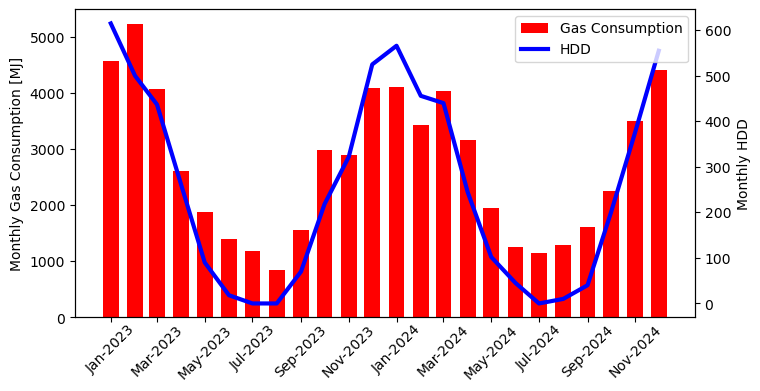

In [3]:
# Initialize a plot.
# Label the axes as 'ax1' because we will need to switch to a second set of axis on the right
fig, ax1 = plt.subplots()

# Draw the bar graph for energy consumption
ax1.bar(df["Date"], df["Gas Consumption [MJ]"], color = "red", width = 20, label = "Gas Consumption")
ax1.set_ylabel("Monthly Gas Consumption [MJ]")

# Format the date time axis ticks to show every other month and rotate the text
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
ax1.set_xticks(df["Date"][::2])
ax1.xaxis.set_tick_params(rotation=45, pad = 0) 

# Switch from the left axis to the right axis
ax2 = ax1.twinx()

# Draw the line graph for degree-days
ax2.plot(df["Date"], df["HDD"], color = "blue", linewidth = 3, label = "HDD")
ax2.set_ylabel("Monthly HDD")

# Collect the labels for each axis and create a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc = "upper right")

# Format the graph
fig.set_figheight(4)
fig.set_figwidth(8)

plt.show()

* <span style="color:limegreen;">Do you notice any trends appearing between monthly energy consumption and heating degree-days? </span>
* <span style="color:limegreen;">How strong would you say that trend is? </span>

### 1.2 Scatter Plot of the Data

Now let's plot this data as a scatter plot and notice if any trends appear, and if so, are they any different than what you noticed in the previous step.

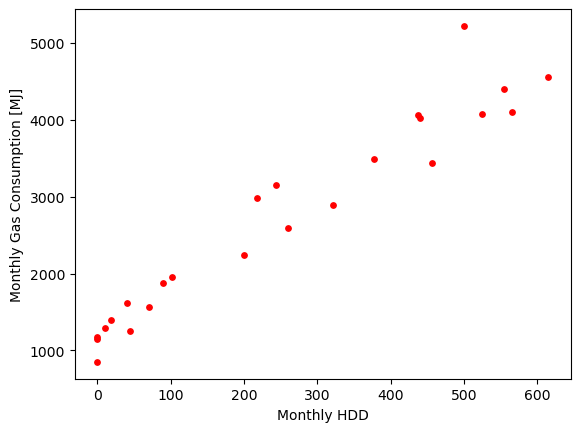

In [4]:
fig, ax = plt.subplots()

# Draw the bar graph for energy consumption
ax.scatter(df["HDD"], df["Gas Consumption [MJ]"], c = "red", s = 15)

ax.set_xlabel("Monthly HDD")
ax.set_ylabel("Monthly Gas Consumption [MJ]")

plt.show()

Look at the axes. Why can this graph be misleading? 

<span style = "color:dodgerblue;">We can control how matplotlib and other plotting tools present the axis. Here, I want to ensure that the axes intersect at zero, and I prefer that the axis end on a tick mark. We will edit these with the matplotlib methods ax.set_xlim() and ax.set_xticks() in the next step. Simple things like this are a good way to improve the quality of your figures.</span>

### 1.3 Linear Regression

Next we will redraw the graph, but also include a line of best fit and include the equation.

First calculate the equation of the regression line. We will use a numpy function called polyfit (polynomial fit) with a degree of 1.

In [5]:
# m is the slope and b is the intercept
m, b = np.polyfit(df["HDD"], df["Gas Consumption [MJ]"], 1)

# Calculate the predict y value of this equation and the coefficient of determination (r^2).
y_predict = m * df["HDD"] + b

r2 = r2_score( df["Gas Consumption [MJ]"], y_predict)

print (f"The equation for this line is y = {m:.4f}x + {b:.4f}.")
print (f"The r^2 value is {r2:.4f}")

The equation for this line is y = 5.8769x + 1232.9516.
The r^2 value is 0.9334


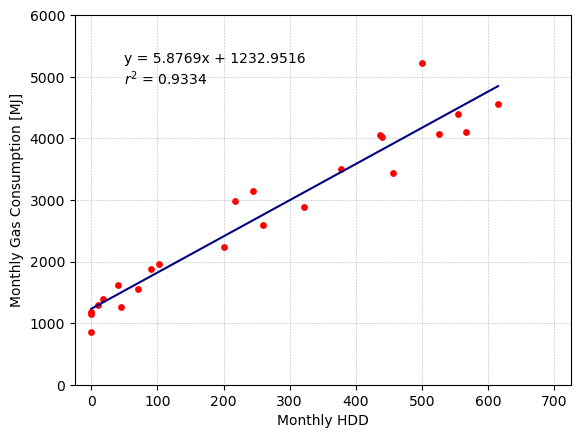

In [6]:
fig, ax = plt.subplots()

# Draw the bar graph for energy consumption
ax.scatter(df["HDD"], df["Gas Consumption [MJ]"], c = "red", s = 15)

# Create arrays for the line of best fit
x_ = [0, df["HDD"].max()]
y_ = [b, m * df["HDD"].max() + b]

# Plot the line of best fit
ax.plot(x_, y_, color = "navy")

ax.set_xlabel("Monthly HDD")
ax.set_ylabel("Monthly Gas Consumption [MJ]")

# Format the x and y axis ticks
# Create an array of the values we want ticks to appear at using the numpy arange function
# Here we want the x axis in intervals of 100 and the y-axis in intervals of 100
# The +100, or +1000 tells numpy to stop at the interval above the maximum value
x_ticks = np.arange(0, df["HDD"].max() + 100, 100)
y_ticks = np.arange(0, df["Gas Consumption [MJ]"].max() + 1000, 1000)
ax.set_xticks (x_ticks)
ax.set_yticks (y_ticks)

ax.set_xlim(-25, x_ticks.max() + 25) # Can leave a small buffer (of 25) on either side of the x-axis so dots are displayed entirely
ax.set_ylim(0, y_ticks.max())

# Add a grid to help us interpolate the values on the plot
ax.grid(linestyle = ":", color = "gray", linewidth = 0.4)

# Create an annotation with the equation and r^2 value in the top left
plt.text (0.1, 0.9, f"y = {m:.4f}x + {b:.4f}\n$r^2$ = {r2:.4f}", transform = ax.transAxes, va = "top")

plt.show()

## 2. Test your understanding
From the results above, can you answer the following:

* <span style = "color:limegreen;"> What is the monthly and annual base gas consumption of this building? </span>
* <span style = "color:limegreen;"> What is the annual heating load for gas consumption? </span>
    * <span style = "color:limegreen;"> Hint, You will need to convert the heat loss coefficient into units of energy similar to Question 2 of your coursework.</span>
* <span style = "color:limegreen;"> If the building owner were to a hot water tank and cooking appliances which were 25% more efficient. How would the equation change? </span>
* <span style = "color:limegreen;"> Likewise, if the building owner were to perform envelope upgrades (walls, windows, roof, ground, ventilation) which combined made the envelope 25% more efficient, how would the equation change? </span>
* <span style = "color:limegreen;"> What could explain the deviations between the measured and predicted values? </span>
* <span style = "color:limegreen;"> Would you be able to do the same procedure for an all electric building? </span>